In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


In [5]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}


In [6]:
histories = {}
for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=1)
    histories[name] = history



Training with SGD optimizer...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7310 - loss: 1.0481 - val_accuracy: 0.9162 - val_loss: 0.3209
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8984 - loss: 0.3661 - val_accuracy: 0.9235 - val_loss: 0.2675
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9112 - loss: 0.3152 - val_accuracy: 0.9330 - val_loss: 0.2390
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9247 - loss: 0.2719 - val_accuracy: 0.9397 - val_loss: 0.2156
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9294 - loss: 0.2538 - val_accuracy: 0.9440 - val_loss: 0.1988

Training with Adam optimizer...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8721 - loss: 0.4549 - val_accuracy: 0.9630 - val_loss: 0.1268
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9620 - loss: 0.1282 - val_accuracy: 0.9702 - val_loss: 0.1000
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy:

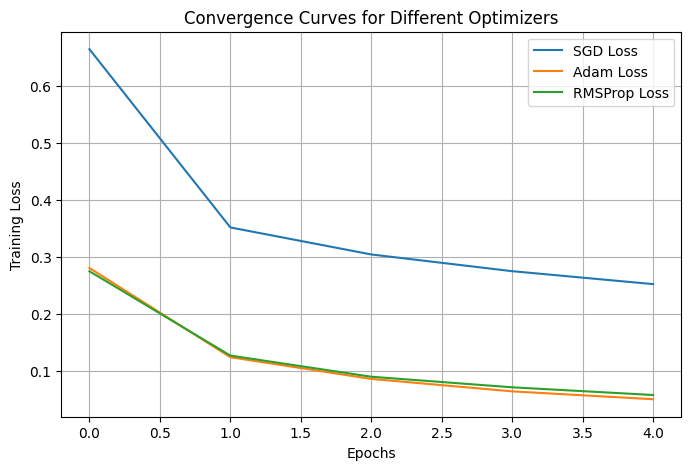

In [7]:
plt.figure(figsize=(8, 5))
for name, hist in histories.items():
    plt.plot(hist.history['loss'], label=f'{name} Loss')
plt.title('Convergence Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True)
plt.show()
